# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [9]:
# read the titanic train.csv file into a dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train=pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# show the percentage of the passengers that boarded at different ports
percentage = df_train.value_counts('Embarked',normalize=True)*100
percentage

Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64

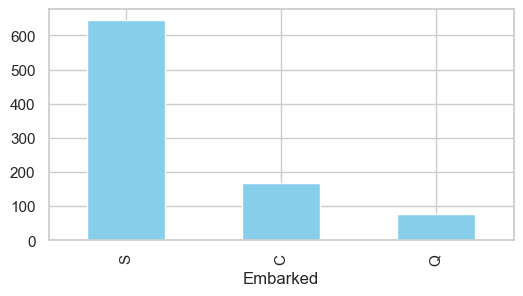

In [11]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below
sns.set(style='whitegrid')
plt.figure(figsize=(6,3))
df_train['Embarked'].value_counts().plot(kind='bar', color='skyblue')
plt.show()

![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [12]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.
df_train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

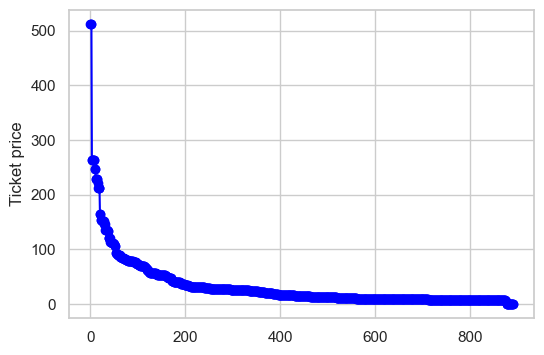

In [20]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below
df_sorted = df_train.sort_values(by='Fare', ascending=False).reset_index(drop=True)
sns.set(style='whitegrid')
plt.figure(figsize=(6,4))
plt.plot(df_sorted['Fare'], marker='o', linestyle='-', color='blue')
plt.ylabel('Ticket price')

plt.show()


![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



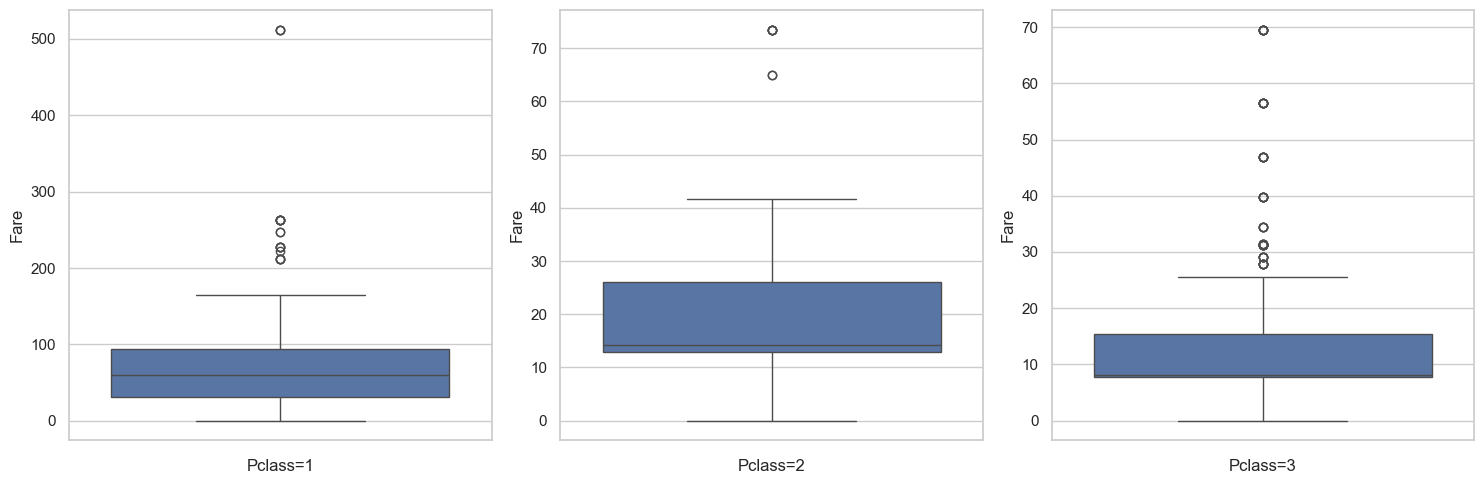

In [27]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, pclass in enumerate(sorted(df_train['Pclass'].unique())):
    sns.boxplot(data=df_train[df_train['Pclass'] == pclass], y='Fare', ax=axs[i])
    
    axs[i].set_xlabel(f'Pclass={pclass}')
    axs[i].set_ylabel('Fare')

plt.tight_layout()
plt.show()

![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [28]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function
survival_rates = df_train.groupby('Pclass')['Survived'].mean().reset_index()
highest_survival_rate = survival_rates.loc[survival_rates['Survived'].idxmax()]
print(f"For people with ticket class {highest_survival_rate['Pclass']}, the survival rate is the highest, which is {highest_survival_rate['Survived']:.2f}.")

For people with ticket class 1.0, the survival rate is the highest, which is 0.63.


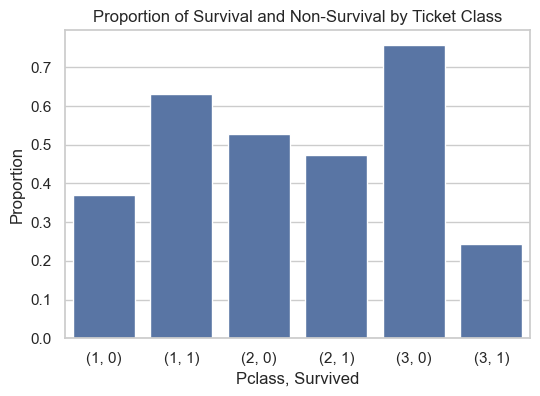

In [38]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below
# Group by 'Pclass' and 'Survived' and calculate the count
# Group by 'Pclass' and 'Survived' and calculate the count
grouped_data = df_train.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')


grouped_data['Proportion'] = grouped_data.groupby('Pclass')['Count'].transform(lambda x: x / x.sum())

grouped_data['Pclass_Survived'] = "(" + grouped_data['Pclass'].astype(str) + ", " + grouped_data['Survived'].astype(str) + ")"


plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass_Survived', y='Proportion', data=grouped_data)

plt.xlabel('Pclass, Survived')
plt.ylabel('Proportion')
plt.title('Proportion of Survival and Non-Survival by Ticket Class')


plt.show()

![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
